<a href="https://colab.research.google.com/github/RufinoMartin/DataScience2021/blob/main/Notebook_Integrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Presentacion

##  1.1 Integrantes:

**Pedro Vernengo:** Politólogo y Analista de Planificación de Políticas de Salud Pública. 

**Rufino Martín:** Psicologo e Investigador en Geopolitica e Inteligencia.

## 1.2 Tema de Investigacion y Desarrollo:

Politicas Gubernamentales y sus efectos economicos: estudio de la economia mundial durante el Covid-19. 

## 1.3 Objetivos : 

- Analizar la variación del precio de commodities y los índices bursátiles en relación a las medidas gubernamentales por COVID19, dentro del marco temporal 2019-2022.
- Exploración de relaciones entre las variables y generación de visualizaciones sobre la variación del precio de commodities, a fines de nutrir potenciales explicaciones. 
- Creación de modelo de aprendizaje automático para evaluar y predecir valores de los activos. 


## 1.4 Repositorio: 

https://github.com/RufinoMartin/DataScience2021




# 2. Los Datos y sus variables

## 2.1 Primer Grupo de Variables : “Medidas Gubernamentales frente al COVID”
Definición: Medidas ejecutivas sanitarias, economicas y sociales en 168 paises a raiz de la situacion Covid19.

Operacionalización: Conjuntos de Variables definidas y operacionalizadas por la Universidad de Oxford, obtenidas de los ministerios de salud de todos los gobiernos.

Notebook: Restricciones_Covid_Final.ipynb.

Fuente: Universidad de Oxford.

## 2.2 Segundo Grupo de Variables : “Precio de Indices de Commodities”
Definición: Precio agrupado de Indices de Commodities (Metales, Industria, Agro, Alimentos, Energia).

Operacionalización: Conteo y promediado de precios históricos.

Notebook: Indices_Commodities_Final.ipynb

Fuente: Fondo Monetario Internacional.

## 2.3 Tercer Grupo de Variables : “Precio de Índices Bursátiles”
Definición: Precios de los mayores Índices Bursatiles Mundiales

Operacionalización: Conteo y promediado de precios históricos.

Notebook: Indices_Bursatiles_Finales.ipynb.

Fuente: Sitio Web MarketWatch.

In [ ]:
#Importacion de Librerias

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas_profiling
from pandas_profiling import ProfileReport
from functools import reduce
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Por la gran cantidad y tamaño de los datasets, se ha realizado una digestion previa de los mismos. Para acceder a los notebooks preliminares donde se realizó dicha labor, consultar los notebooks del repositorio.
 
El resultado del procesamiento preliminar la misma ha sido un archivo .CSV, que procedemos a importar, y que de no ejecutarse correctamente el pd.read, se encuentra disponible aqui:
 
https://github.com/RufinoMartin/DataScience2021/blob/main/DatasetFinal.csv
 
Copiar el URL del Raw, y pegar:
 

In [ ]:
df_Integrado = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/DatasetFinal.csv?token=GHSAT0AAAAAABTJFJHETL6W63I7HIAMUOLSYSSB6YQ')

# Data Wrangling

Procedemos a corregir los tipos de datos de CountryName y DateTime.

In [ ]:
# Observamos que tipos de datos tenemos en el dataframe.

df_Integrado.dtypes

Unnamed: 0                          int64
Pais                               object
Fecha                              object
Ind. Rigor C19                    float64
Ind. Sanitario C19                float64
Ind. Apoyo Economico C19          float64
Promedio Respuesta Estatal C19    float64
Alimentos                         float64
Industrial                        float64
Agro                              float64
Metales                           float64
Energia                           float64
Promedio Commodities              float64
Dolar Americano                   float64
$S&P500                           float64
$SHA                              float64
$UKX                              float64
$SX5P                             float64
Promedio Bursatil                 float64
dtype: object

In [ ]:
# Removemos columna residual

df_Integrado.drop(columns={'Unnamed: 0'}, inplace=True)

In [ ]:
# 'Fecha' a formato DateTime

df_Integrado['Fecha'] = pd.to_datetime(df_Integrado['Fecha'])

In [ ]:
# 'Pais' a formato String

df_Integrado['Pais'] = df_Integrado['Pais'].astype(str)

In [ ]:
# Corroboramos

df_Integrado.dtypes

Pais                                      object
Fecha                             datetime64[ns]
Ind. Rigor C19                           float64
Ind. Sanitario C19                       float64
Ind. Apoyo Economico C19                 float64
Promedio Respuesta Estatal C19           float64
Alimentos                                float64
Industrial                               float64
Agro                                     float64
Metales                                  float64
Energia                                  float64
Promedio Commodities                     float64
Dolar Americano                          float64
$S&P500                                  float64
$SHA                                     float64
$UKX                                     float64
$SX5P                                    float64
Promedio Bursatil                        float64
dtype: object

In [ ]:
# Reordenamos Columnas

df_Integrado = df_Integrado[['Fecha', 'Pais', 'Ind. Rigor C19', 'Ind. Sanitario C19', 'Ind. Apoyo Economico C19','Promedio Respuesta Estatal C19',
                             'Alimentos','Industrial','Agro','Metales','Energia','Promedio Commodities',
                             'Dolar Americano','$S&P500','$SHA','$UKX','$SX5P','Promedio Bursatil']]

In [ ]:
df_Integrado.head(5)

,Fecha,Pais,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
0,2019-01-01,0,0.0,0.0,0.0,0.0,100.466542,118.836909,103.536150,114.711385,133.302098,117.078244,95.58,2704.10,2584.57,6968.85,2897.13,3788.6625
1,2019-02-01,0,0.0,0.0,0.0,0.0,98.772205,125.808562,103.608780,120.811052,136.048817,119.011525,96.16,2709.80,2940.95,7074.73,3029.67,3938.7875
2,2019-03-01,0,0.0,0.0,0.0,0.0,98.063110,127.539176,105.409046,121.105733,138.256367,119.910036,97.28,2834.40,3090.76,7279.19,3117.01,4080.3400
3,2019-04-01,0,0.0,0.0,0.0,0.0,101.569201,129.656529,104.681017,121.924057,143.768294,123.416731,97.48,2945.83,3078.34,7418.22,3199.51,4160.4750
4,2019-05-01,0,0.0,0.0,0.0,0.0,98.094289,129.330578,105.436360,121.161561,139.410557,120.477541,97.61,2752.06,2898.70,7161.71,3042.89,3963.8400


In [ ]:
#Redondeamos decimales

df_Integrado = round(df_Integrado, 2)

In [ ]:
# Dropeamos todas las filas en las cuales la fecha va mas alla de enero del 2022, ya que hasta alli llega nuestra fuente de Commodities actualizada por el FMI. 

df_Integrado.drop(df_Integrado.loc[df_Integrado['Fecha'] > '2022-01-01 01:00:00'].index, inplace=True)


In [ ]:
df_Integrado.shape

(7812, 18)

In [ ]:
df_Integrado.head(1)

,Fecha,Pais,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
0,2019-01-01,0,0.0,0.0,0.0,0.0,100.47,118.84,103.54,114.71,133.3,117.08,95.58,2704.1,2584.57,6968.85,2897.13,3788.66


### **Indices utilizados**


- ***Gubernamentales C-19:***

"Indice Rigor C19" (Confinamientos, Restricciones, Prohibiciones)

"Indice Sanitario C19" (Modificaciones protocolares, Regimen de testeos, inversion en salud, pasaporte sanitario)

"Indice Apoyo Economico C19" (Subvenciones economicas, planes economicos ejecutivos)

***Superindice:*** "Promedio Respuesta Estatal C19" (Sintesis de todos los indicadores)


- ***Bursatiles:***

"Dolar Americano" ( DYX o The U.S. Dollar Index is used to measure the value of the dollar against a basket of six world currencies: Euro, Swiss Franc, Japanese Yen, Canadian dollar, British pound, and Swedish Krona)

"S&P500" ("Standard and Poor 500" is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States)

"SHA" (The Shanghai Stock Exchange is one of the three stock exchanges operating independently in mainland China. The Shanghai Stock Exchange is the world's 3rd largest stock market by market capitalization at US$7.62 trillion as of July 2021)

"UKX" (The "FTSE 100 Index" The Financial Times Stock Exchange 100 Index, is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalisation.

"SX5P" (The STOXX Europe 50 index provides a blue-chip representation of supersector leaders in Europe covering almost 50% of the free-float market capitalization of the European stock market.)

***Superindice:***: "Promedio Bursatil" (Promedia los 4 Indices superiores, a excepcion del dolar)

- ***Comoddities (FMI):***
 
 
 "Alimentos",	"Industrial",	"Agro",	"Metales" y "Energia".

 ***Superindice:***:  "Promedio Commodities" ( Promedia los 5 Indices superiores)


# Exploracion de Datos (EDA) 

In [ ]:
df_Integrado.shape

(7812, 18)

In [ ]:
df_Integrado.isnull().values.any()

False

In [ ]:
df_Integrado.describe

<bound method NDFrame.describe of           Fecha      Pais  Ind. Rigor C19  Ind. Sanitario C19  Ind. Apoyo Economico C19  Promedio Respuesta Estatal C19  Alimentos  Industrial    Agro  Metales  Energia  Promedio Commodities  Dolar Americano  $S&P500     $SHA     $UKX    $SX5P  Promedio Bursatil
0    2019-01-01         0            0.00                0.00                       0.0                            0.00     100.47      118.84  103.54   114.71   133.30                117.08            95.58  2704.10  2584.57  6968.85  2897.13            3788.66
1    2019-02-01         0            0.00                0.00                       0.0                            0.00      98.77      125.81  103.61   120.81   136.05                119.01            96.16  2709.80  2940.95  7074.73  3029.67            3938.79
2    2019-03-01         0            0.00                0.00                       0.0                            0.00      98.06      127.54  105.41   121.11   138.26         

In [ ]:
df_Integrado.count()

Fecha                             7812
Pais                              7812
Ind. Rigor C19                    7812
Ind. Sanitario C19                7812
Ind. Apoyo Economico C19          7812
Promedio Respuesta Estatal C19    7812
Alimentos                         7812
Industrial                        7812
Agro                              7812
Metales                           7812
Energia                           7812
Promedio Commodities              7812
Dolar Americano                   7812
$S&P500                           7812
$SHA                              7812
$UKX                              7812
$SX5P                             7812
Promedio Bursatil                 7812
dtype: int64

In [ ]:
df_Integrado.info

<bound method DataFrame.info of           Fecha      Pais  Ind. Rigor C19  Ind. Sanitario C19  Ind. Apoyo Economico C19  Promedio Respuesta Estatal C19  Alimentos  Industrial    Agro  Metales  Energia  Promedio Commodities  Dolar Americano  $S&P500     $SHA     $UKX    $SX5P  Promedio Bursatil
0    2019-01-01         0            0.00                0.00                       0.0                            0.00     100.47      118.84  103.54   114.71   133.30                117.08            95.58  2704.10  2584.57  6968.85  2897.13            3788.66
1    2019-02-01         0            0.00                0.00                       0.0                            0.00      98.77      125.81  103.61   120.81   136.05                119.01            96.16  2709.80  2940.95  7074.73  3029.67            3938.79
2    2019-03-01         0            0.00                0.00                       0.0                            0.00      98.06      127.54  105.41   121.11   138.26           

In [ ]:
CorrelacionP = df_Integrado.corr(method="pearson")
CorrelacionP

,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
Ind. Rigor C19,1.000000,0.936312,0.464501,0.926592,-0.090910,0.025001,-0.112806,0.102006,-0.204999,-0.153127,-0.189712,-0.008440,0.079240,-0.305363,-0.208251,-0.138677
Ind. Sanitario C19,0.936312,1.000000,0.485740,0.988490,0.135320,0.241197,0.100331,0.314526,0.010058,0.073824,-0.310678,0.219534,0.284972,-0.144144,-0.012622,0.074592
Ind. Apoyo Economico C19,0.464501,0.485740,1.000000,0.609879,-0.071588,0.024762,-0.079511,0.091044,-0.142647,-0.105785,-0.195629,0.003441,0.096179,-0.222582,-0.153258,-0.091583
Promedio Respuesta Estatal C19,0.926592,0.988490,0.609879,1.000000,0.104569,0.218032,0.073326,0.295635,-0.021490,0.042497,-0.312833,0.192315,0.268517,-0.171762,-0.042810,0.046154
Alimentos,-0.090910,0.135320,-0.071588,0.104569,1.000000,0.919030,0.922989,0.862100,0.899978,0.953727,-0.396772,0.946241,0.778810,0.813178,0.902462,0.941494
Industrial,0.025001,0.241197,0.024762,0.218032,0.919030,1.000000,0.913126,0.983133,0.725112,0.824731,-0.655258,0.876470,0.833134,0.659352,0.751620,0.840568
Agro,-0.112806,0.100331,-0.079511,0.073326,0.922989,0.913126,1.000000,0.867335,0.787299,0.857831,-0.540963,0.855477,0.807218,0.722265,0.775602,0.855411
Metales,0.102006,0.314526,0.091044,0.295635,0.862100,0.983133,0.867335,1.000000,0.658829,0.768378,-0.740376,0.851855,0.864520,0.551823,0.666395,0.781912
Energia,-0.204999,0.010058,-0.142647,-0.021490,0.899978,0.725112,0.787299,0.658829,1.000000,0.986789,-0.177270,0.914971,0.699628,0.834571,0.928093,0.929611
Promedio Commodities,-0.153127,0.073824,-0.105785,0.042497,0.953727,0.824731,0.857831,0.768378,0.986789,1.000000,-0.294651,0.956323,0.768754,0.830156,0.932363,0.955467


### Analisis Multivariado Exploratorio para los Indices Gubernamentales C-19

In [ ]:
# Correr si hay errores en visualizaciones.

%matplotlib inline
plt.close('all')

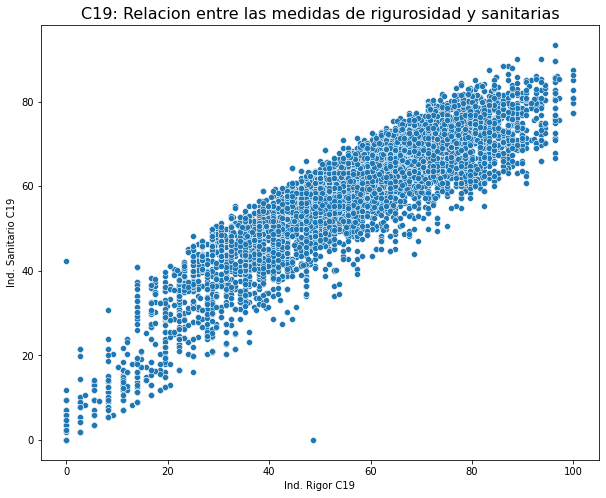

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ind. Rigor C19',y='Ind. Sanitario C19',data=df_Integrado)
plt.title('C19: Relacion entre las medidas de rigurosidad y sanitarias', fontsize=16)
plt.show()

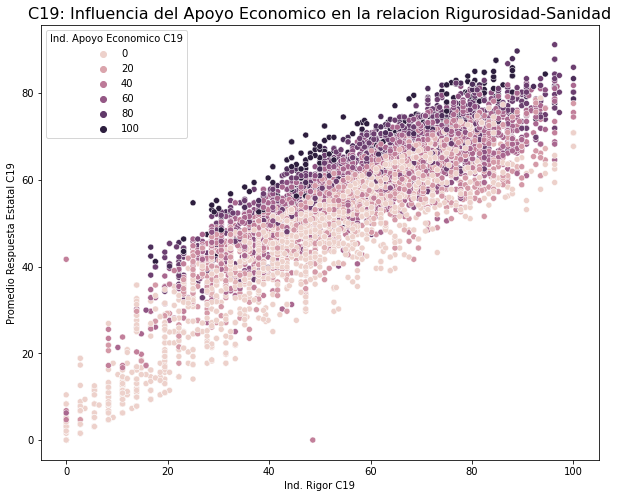

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ind. Rigor C19',y='Promedio Respuesta Estatal C19',data=df_Integrado,hue='Ind. Apoyo Economico C19')
plt.title('C19: Influencia del Apoyo Economico en la relacion Rigurosidad-Sanidad', fontsize=16)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


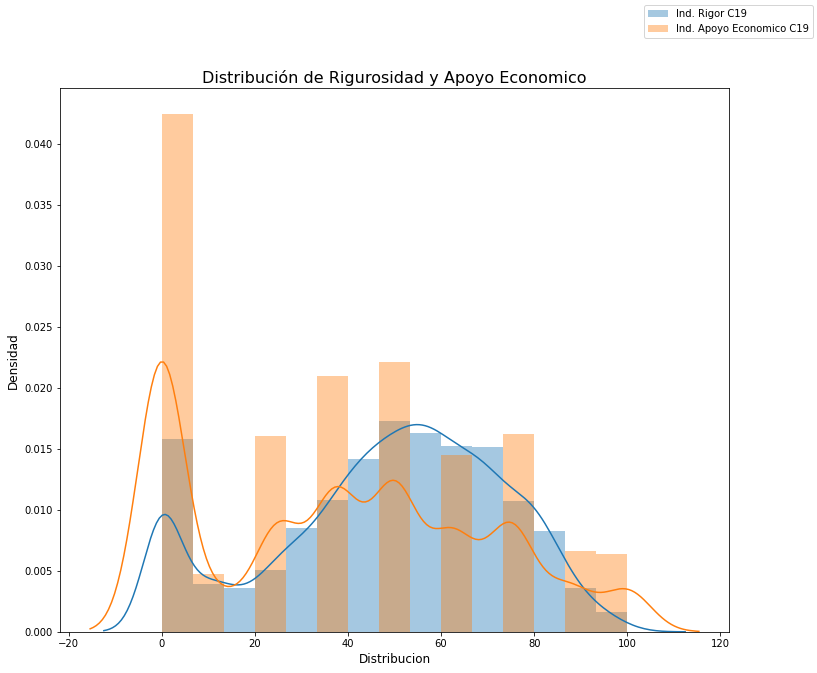

In [ ]:
#Grafico compartido para las distribuciones del Indice de Rigor y de Apoyo Economico. 

fig = plt.figure(figsize=(12,10))

sns.distplot(df_Integrado['Ind. Rigor C19'], kde=True, hist=True, bins=15, label='Ind. Rigor C19')
sns.distplot(df_Integrado['Ind. Apoyo Economico C19'], kde=True, hist=True, bins=15, label='Ind. Apoyo Economico C19')

fig.legend()
plt.xlabel('Distribucion', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Distribución de Rigurosidad y Apoyo Economico', fontsize=16)

plt.show()

**Observaciones**

 Las visualizaciones refuerzan lo que arroja la correlacion de Pearson: Los indices de medidas gubernamentales para el Covid19 guardan gran relacion entre si. Esto tiene sentido:

1) porque comparten algunos de los indicadores de los cuales se conforman.

2) porque los indices reflejan politicas ejecutivas, que generalmente aumentaron o dismninuyeron de forma conjunta y en respuesta al incremento de casos/contagios. 

Tambien puede apreciarse la influencia del apoyo economico en el incremento de rigor y de respuesta gubernamental. 

## Analisis Multivariado para los Indices de Commodities 
 

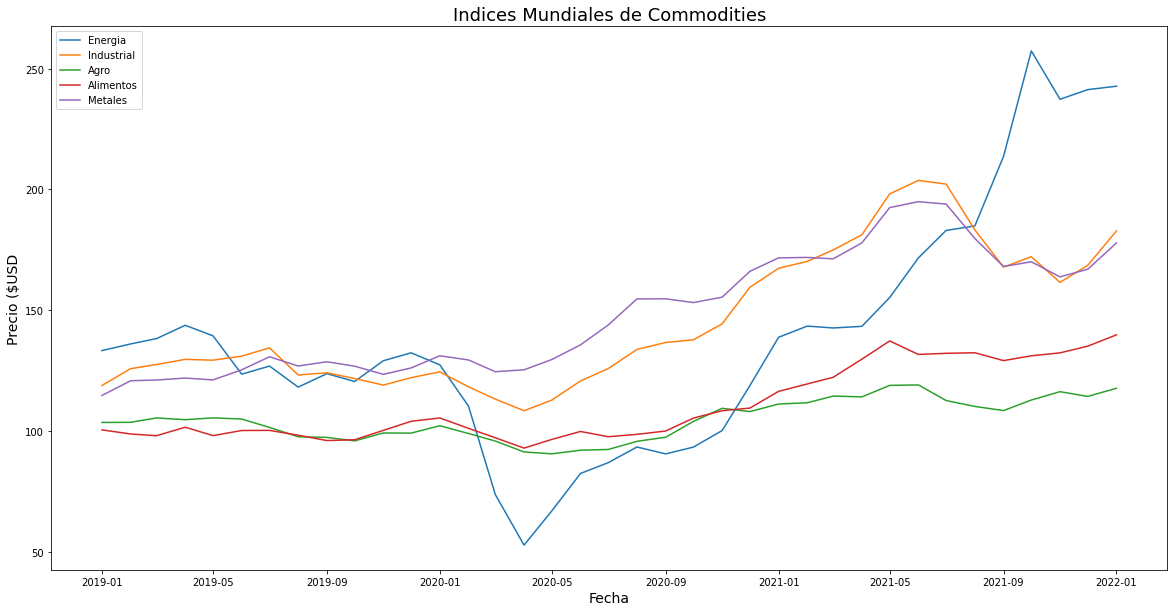

In [ ]:
# Indices de Commodities

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_Integrado.Fecha, df_Integrado['Energia'], label='Energia')
ax.plot(df_Integrado.Fecha, df_Integrado['Industrial'], label='Industrial')
ax.plot(df_Integrado.Fecha, df_Integrado['Agro'], label='Agro')
ax.plot(df_Integrado.Fecha, df_Integrado['Alimentos'],label='Alimentos')
ax.plot(df_Integrado.Fecha, df_Integrado['Metales'],label='Metales')

plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio ($USD', fontsize=14)

plt.legend()
plt.title('Indices Mundiales de Commodities', fontsize=18)
plt.show()

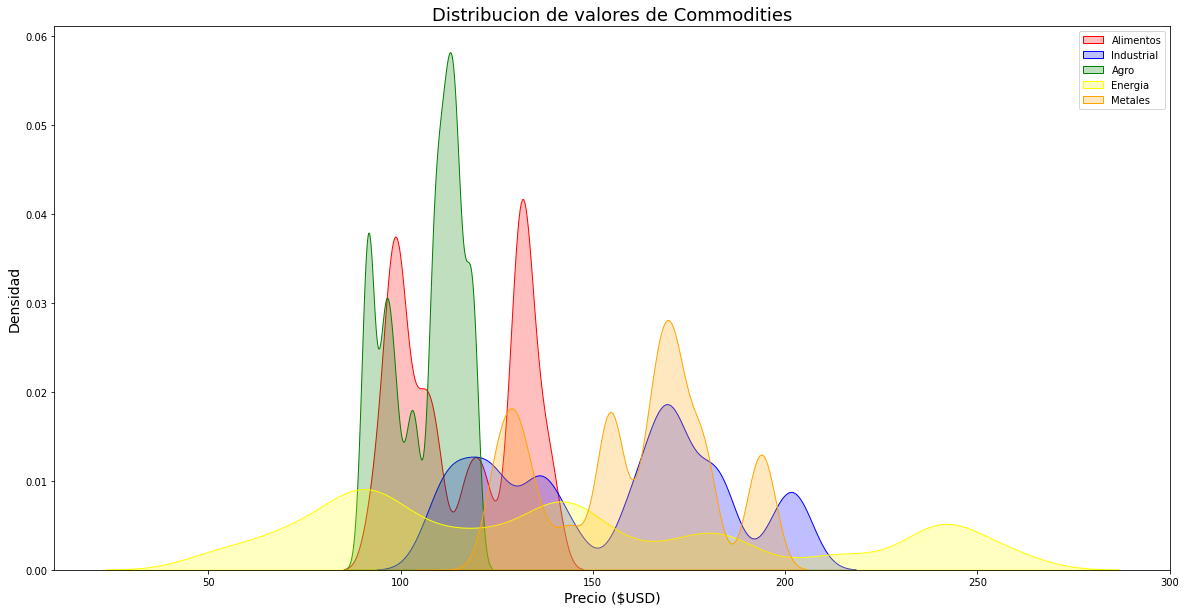

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df_Integrado.Alimentos, label='Alimentos', shade=True, color='red', )
sns.kdeplot(df_Integrado.Industrial, label='Industrial', shade=True, color='blue')
sns.kdeplot(df_Integrado.Agro, label='Agro', shade=True, color='green')
sns.kdeplot(df_Integrado.Energia, label='Energia', shade=True, color='yellow')
sns.kdeplot(df_Integrado.Metales, label='Metales', shade=True, color='orange')

plt.legend()
plt.title('Distribucion de valores de Commodities', fontsize=18)
plt.xlabel('Precio ($USD)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

**Observaciones **

Si bien todos los indices de commodities registran una megatendencia similar para el periodo estudiado (alza), tambien exhiben un comportamiento distinto entre si:

- El Indice Industrial y el de Metales poseen gran relacion. 
- El Indice de Alimentos y el de Agro poseen gran relacion. 
- El Indice de Energia resalta por su comportamiento propio o zigzageante, registrando la maxima baja y la maxima alta entre los indices, es decir, es el mas volatil. 

Por estos motivos, si bien se utilizará una variable que aglutina a estos Indices ("Promedio Commodities"), tambien se seguiran analizando estos indices de forma individual. 

## Analisis Multivariado para los Indices Bursatiles.

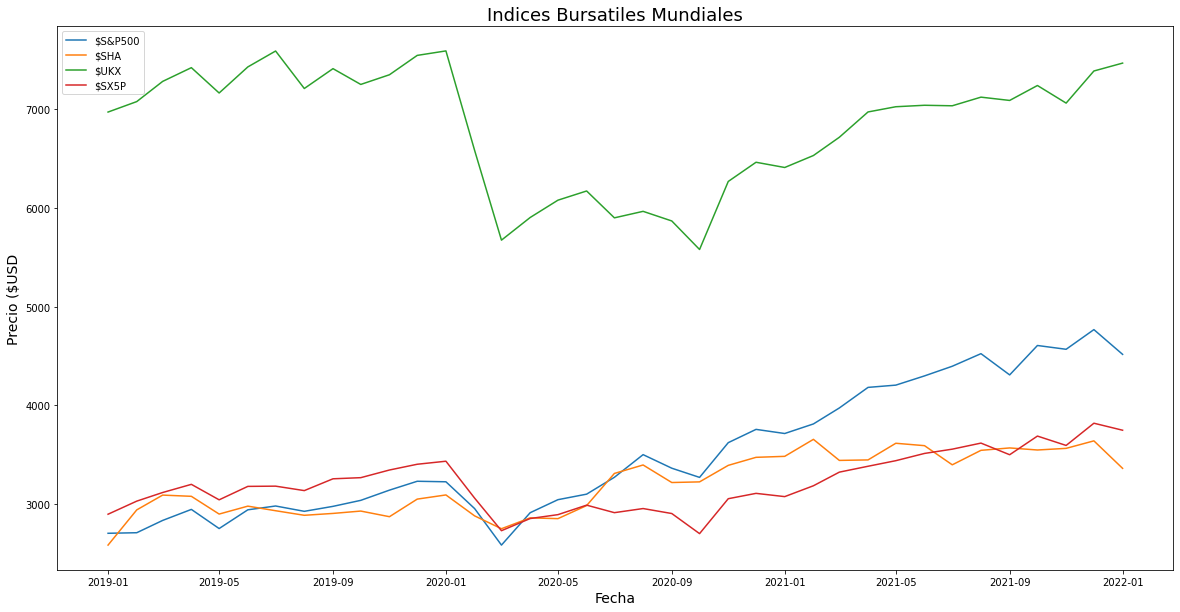

In [ ]:
# Indices de Commodities

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_Integrado.Fecha, df_Integrado['$S&P500'],label='$S&P500')
ax.plot(df_Integrado.Fecha, df_Integrado['$SHA'],label='$SHA')
ax.plot(df_Integrado.Fecha, df_Integrado['$UKX'],label='$UKX')
ax.plot(df_Integrado.Fecha, df_Integrado['$SX5P'],label='$SX5P')

plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio ($USD', fontsize=14)
plt.legend()
plt.title('Indices Bursatiles Mundiales', fontsize=18)
plt.show()

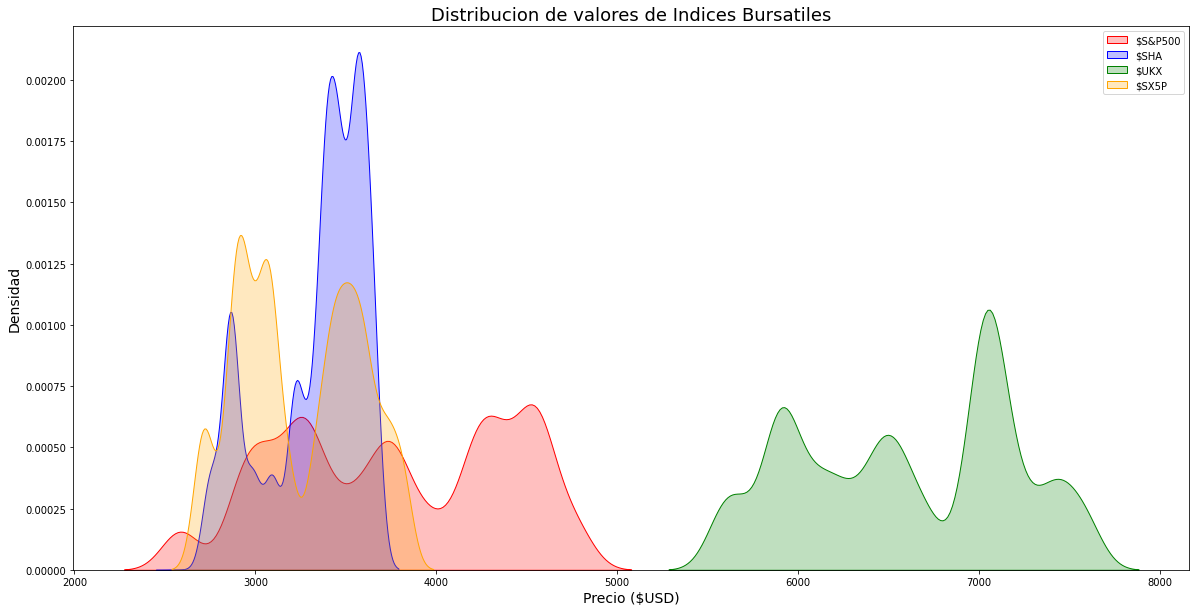

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df_Integrado['$S&P500'], label='$S&P500', shade=True, color='red')
sns.kdeplot(df_Integrado['$SHA'], label='$SHA', shade=True, color='blue')
sns.kdeplot(df_Integrado['$UKX'], label='$UKX', shade=True, color='green')
sns.kdeplot(df_Integrado['$SX5P'], label='$SX5P', shade=True, color='orange')

plt.legend()
plt.title('Distribucion de valores de Indices Bursatiles', fontsize=18)
plt.xlabel('Precio ($USD)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

**Observaciones**

Se puede verificar un patron comun para los 4 Indices Bursatil, aun perteneciendo a distintas regiones. Se cumple asi el requisito de utilizarlos, de forma unificada, como una variable financiera representativa de nivel mundial. De aqui en adelante, el analisis utilizará un promedio que hemos realizado de estos indices, denominado "Promedio Bursatil". 

## Analisis Atemporal Multivariado Para Todas Las Variables

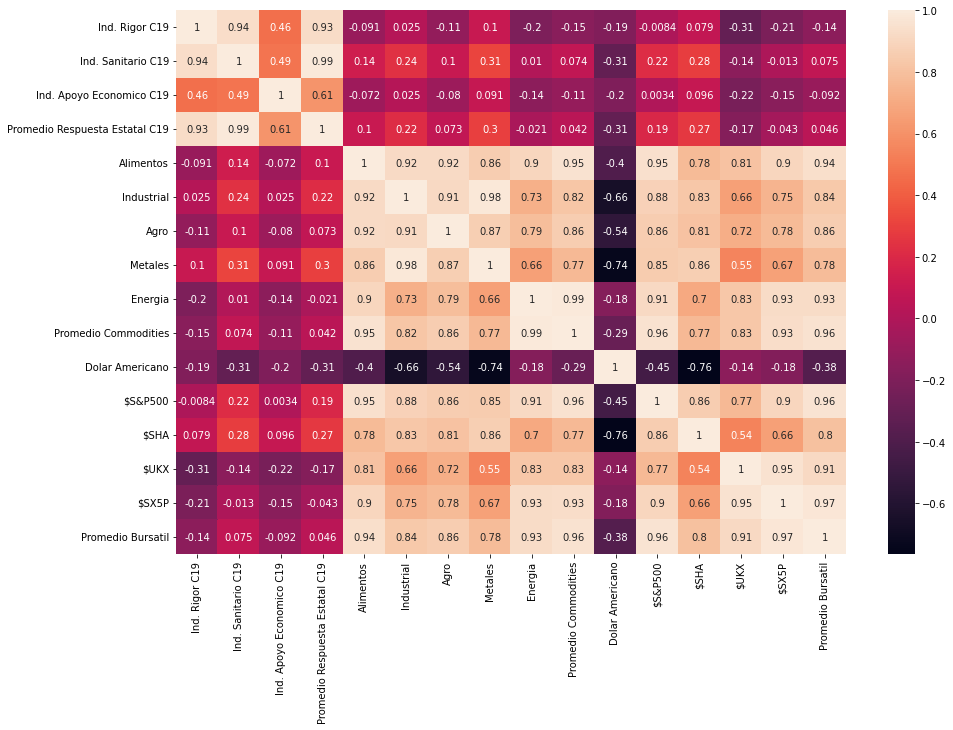

In [ ]:
#Correlaciones de Heatmap 

plt.figure(figsize=(15, 10))

heatmap_test = df_Integrado.corr()
sns.heatmap(heatmap_test, 
            xticklabels = heatmap_test.columns.values,
            yticklabels = heatmap_test.columns.values,
            annot = True);

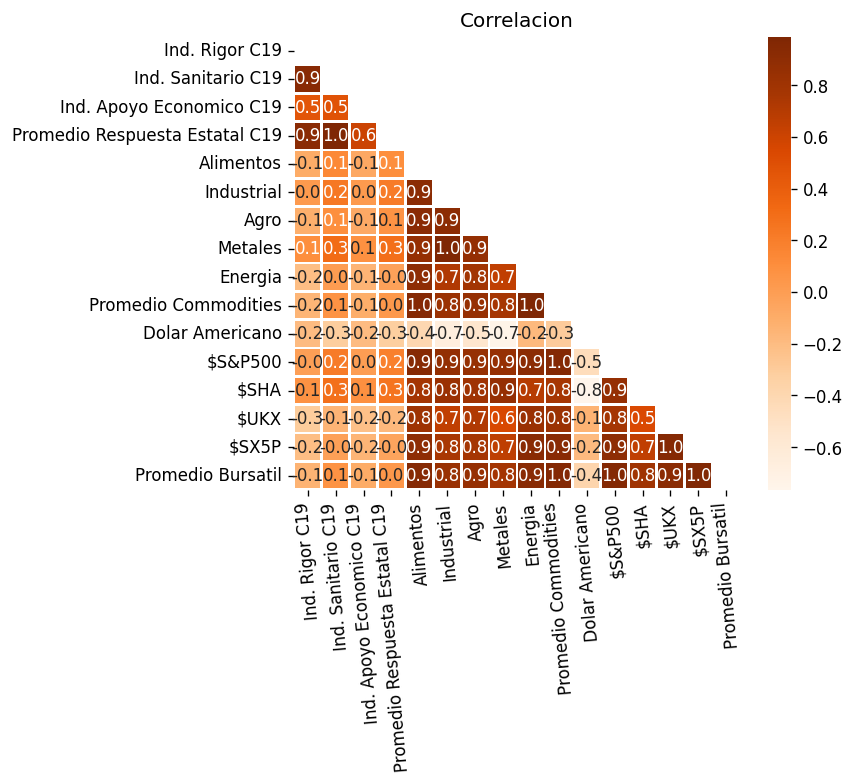

In [ ]:
#Correlaciones
plt.figure(dpi = 120,figsize= (6,5))
mask = np.triu(np.ones_like(df_Integrado.corr(),dtype = bool))
sns.heatmap(df_Integrado.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap = 'Oranges')
plt.yticks(rotation = 0)
plt.xticks(rotation = 95)
plt.title('Correlacion')
plt.show()

**Observaciones**

Luego de estudiar las correlaciones, es posible decir que la correlacion entre Indices Bursatiles y de Commodities es positiva, y que potencialmente este será el campo sobre el cual luego buscaremos introducir la variable Tiempo para producir y probar una hipotesis. 
Añadimos entonces, sobre estos dos superindeces, la relacion con un tercero: las medidas Gubernamentales para el C19.

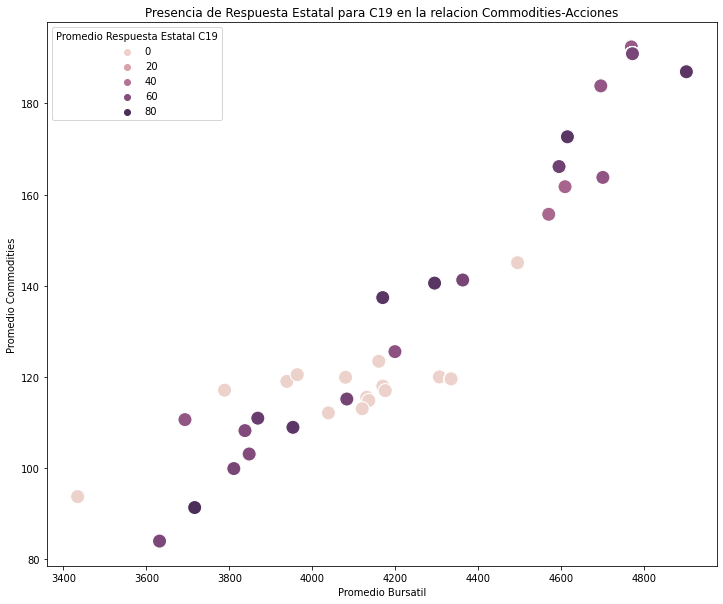

In [ ]:
# Relacion entre los 3 Superindices. 
# Aqui tenemos los candidatos a hipotesis de trabajo y por ende targets: los tres superdinces o variables aglutinantes.

plt.figure(figsize=(12,10))
sns.scatterplot(x='Promedio Bursatil',y='Promedio Commodities',data=df_Integrado,hue='Promedio Respuesta Estatal C19', s=200)
plt.title('Presencia de Respuesta Estatal para C19 en la relacion Commodities-Acciones')
plt.show()

Habiendo corroborado una correlacion positiva entre los superindices, se procede a investigar los commodities de forma individual contra los mismos superindices

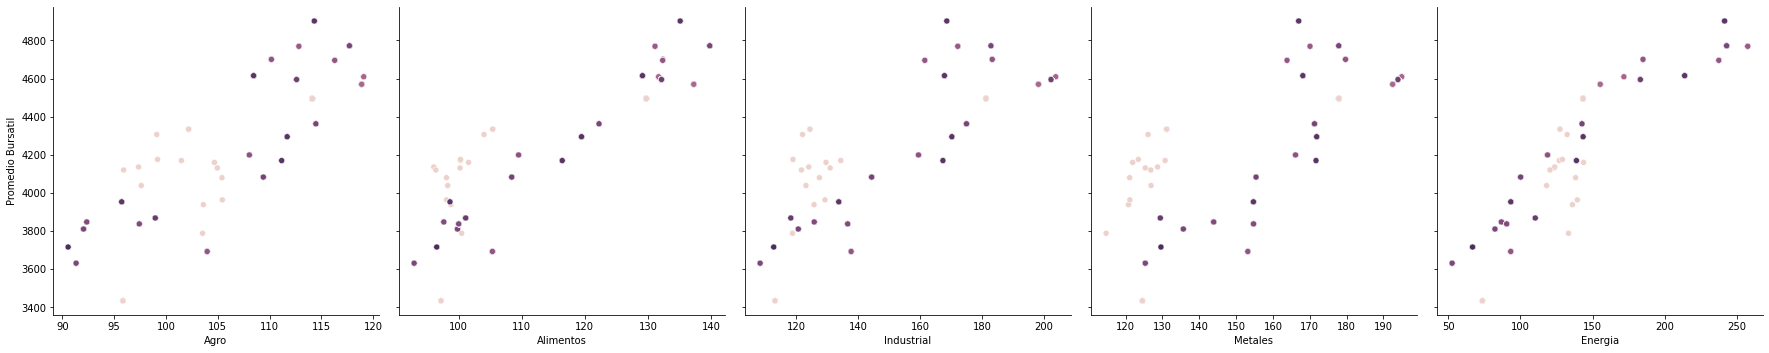

In [ ]:


g = sns.PairGrid(df_Integrado, x_vars=['Agro','Alimentos','Industrial','Metales','Energia'], y_vars='Promedio Bursatil', hue='Promedio Respuesta Estatal C19', height=5)
g.map(sns.scatterplot)


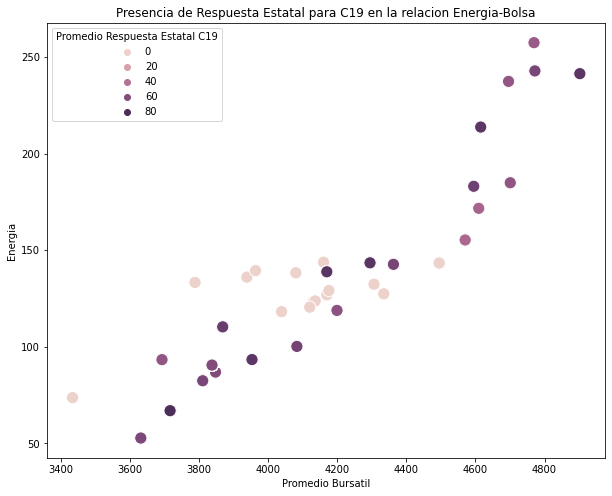

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Promedio Bursatil',y='Energia',data=df_Integrado,hue='Promedio Respuesta Estatal C19', s=150)
plt.title('Presencia de Respuesta Estatal para C19 en la relacion Energia-Bolsa')
plt.show()

In [ ]:
# Profundizamos sobre el Indice de Energia.

fig = px.scatter(df_Integrado, x='Promedio Bursatil', y='Promedio Commodities',
	         size='Energia', log_x=True, hover_name='Energia', color='Promedio Respuesta Estatal C19', size_max=60, title="Precio del Indice de Energia")


fig.show()

# Implementacion de Modelos de Aprendizaje Automatico

La finalidad será desarrollar un modelo que pueda predecir el precio del ***Indice de Energia*** en relacion al resto de las variables que hasta ahora se han analizado.

**Variable dependiente Target**: Indice de Energia, [***'Energia'***]

**Variables independientes:** Los superindices como ***Promedio Bursatil, Promedio Commodities y Respuesta General Estatal C19.***

**Finalidad del Modelo:** Prediccion de Precio

**Modelos Utilizados:** Redes Neuronales Recursivas (RNN) y Regresion Lineal Multivariada (MLR)

El precio de la energia ha sido la variable que mas curioso y volatil comportamiento ha tenido dentro de los commodities en los ultimos dos años. Registra maximos historicos, al igual que la mayoria de las variables, pero posee relativa autonomia respecto a esas variables, en lo que a precio refiere. Es sabido que el precio de la Energia es usualmente manipulado por los Gobiernos por medio de subsidios, pero al mismo tiempo, recibe todas las influencias de otros indices mundiales. Esto la convierte en una variable hibrida en lo que a publico-privado y nacional-internacional refiere, y por ello nos interesa su posible comportamiento futuro. 

A continuacion, comenzamos a experimentar para eventualmente aplicar estas tecnicas a nuestros objetivos.

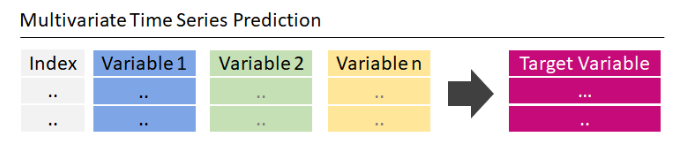

# PCA : Analisis de Componentes Principales.

Para esta altura, sabemos cuales serán nuestras 

- **Variables Feature** (caracteristicas o independientes) = "Promedio Bursatil", "Promedio Commodities", "Promedio Respuesta Estatal C19".
- **Variable Target** ( dependiente, a predecir) = "Energia".

Sabemos tambien, que si bien son pocas dimensiones, el dataframe sigue siendo considerable con sus casi 8000 filas.

Por ello motivo, antes de empezar, realizamos un PCA (analisis de componentes principales), a fines de 
- Obtener una primera visualizacion centrada de los datos.
- Tener a disposicion un dataframe con la dimensionalidad reducida, en caso de necesitarla.

El PCA es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información.

In [ ]:
# Graficamos Primero, el grado de explicacion de la varianza que el PCA puede ofrecer, es decir, cuantos componentes principales (PCs) ayudan a explicar % de varianza.


df = pd.DataFrame(df_Integrado, columns=['Ind. Rigor C19', 'Ind. Sanitario C19', 'Ind. Apoyo Economico C19','Promedio Respuesta Estatal C19',
                             'Alimentos','Industrial','Agro','Metales','Energia','Promedio Commodities',
                             'Dolar Americano','$S&P500','$SHA','$UKX','$SX5P','Promedio Bursatil'])

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Con tan solo 2 componentes principales se explica el casi 100% de la varianza. Esto se debe a que, aunque las variables sean muchas, en realidad son muy parecidas entre si. De ahi nuestra decision de reunirlas en superindices, con los cuales probamos a continuacion:

In [ ]:

df = pd.DataFrame(df_Integrado, columns=['Promedio Respuesta Estatal C19','Energia','Promedio Commodities',
                             'Promedio Bursatil'])

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Confirmando que la varianza entre las caracteristicas se explica a partir de pocos componentes. 
¿Por que? Porque la varianza de estos datos no se explica por sus variables per se, sino porque su relacion la variable TIEMPO. 
Para visualizar esto, probamos plotear 3 componentes principales en 3D. 

In [ ]:

X = df_Integrado[['Ind. Rigor C19', 'Ind. Sanitario C19', 'Ind. Apoyo Economico C19','Promedio Respuesta Estatal C19',
                             'Alimentos','Industrial','Agro','Metales','Energia','Promedio Commodities',
                             'Dolar Americano','$S&P500','$SHA','$UKX','$SX5P','Promedio Bursatil']]

pca = PCA(n_components=3)                         #Definimos reducir a 3 componentes principal
components = pca.fit_transform(X)                 #Estadandarizacion y reduccion.

total_var = pca.explained_variance_ratio_.sum() * 100        #Queremos saber que % de la varianza explican los PCA

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_Integrado['Energia'],
    title=f'Varianza Explicada: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

El PCA de tres componentes explica la varianza de los datos con bastante claridad. Se pueden observar tres agrupaciones mas o menos marcadas.

- En las puntaciones mas bajas de PC1 y PC2, los maximos valores de Energia.
- Para las puntuaciones mas altas de PC1, los valores minimos de Energia.
- Para las puntuaciones mas altas de PC3, una grupacion de valores medios de Energia.

Tentativamente, esto se explica de la siguiente manera: estos 3 componentes principales representan a nuestros 3 superindices: (Promedio Bursatil, Promedio Commodities y Promedio Respuesta Estatal C19). De alli que se formen agrupaciones identificables. 

Se guarda la funcion **components** para nuestro 3-PCA por si llegaramos a necesitarlo. De momento, se utilizaran exclusivamente los 3 superindices sin estandarizarlos, lo cual es una reduccion de la dimensionalidad de misma efectividad, con la ventaja de conservar su identificacion. 

Se procede a desarrollar Modelos de ML. 

# Modelo de Redes Neuronales Recursivas (RNN)

In [ ]:
#Importacion de Librerias

import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns

## Paso #1 Escalamos la data y seleccionamos las variables Feature. 

Transformamos la data en la forma requerida por la red neuronal recurrente (RNN). Comenzamos convirtiendo el indice de Fecha en un indice de Enteros (int). Esto facilita la referencia a columnas especificas mas adelante.

In [ ]:
# Configuramos el tiempo

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2019-01-01'
date_end = '2022-01-01'

In [ ]:
# Armamos el dataframe a traves de una copia del original. 

train_df = df_Integrado.sort_values(by=['Fecha']).copy()

# Hacemos una copia de Fecha, antes de cambiarles el tipo de dato. 

date_index = train_df['Fecha']

# Por las dudas querramos probar esto mas adelante:

# d = pd.to_datetime(train_df.index)
# train_df['Month'] = d.strftime("%m")
# train_df['Year'] = d.strftime("%Y") 

train_df.info

<bound method DataFrame.info of           Fecha           Pais  Ind. Rigor C19  Ind. Sanitario C19  Ind. Apoyo Economico C19  Promedio Respuesta Estatal C19  Alimentos  Industrial    Agro  Metales  Energia  Promedio Commodities  Dolar Americano  $S&P500     $SHA     $UKX    $SX5P  Promedio Bursatil
0    2019-01-01              0            0.00                0.00                       0.0                            0.00     100.47      118.84  103.54   114.71   133.30                117.08            95.58  2704.10  2584.57  6968.85  2897.13            3788.66
1    2019-02-01              0            0.00                0.00                       0.0                            0.00      98.77      125.81  103.61   120.81   136.05                119.01            96.16  2709.80  2940.95  7074.73  3029.67            3938.79
2    2019-03-01              0            0.00                0.00                       0.0                            0.00      98.06      127.54  105.41   121.11

A continuacion seleccionamos las variables Feature (o caracteristica). 
Como entrenamos un modelo de preddicion sobre data escalada, esto tambien resultara en predicciones escaladas. Neceistamos poder desescalar las proyecciones luego. 
Agregamos una columna extra llamada "Predicciones", que ayudara posteriormente cuando necesitemos desescalar la data.
Procedemos a seleccionar las variables Feature. 


In [ ]:
# List de Features

FEATURES = ['Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19','Energia'] 


print('FEATURE LIST')
print([f for f in FEATURES])

FEATURE LIST
['Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19', 'Energia']


In [ ]:
# Creamos el dataset con features y filtramos la data en relacion a ellas.
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# Agregamos la columna de Prediccion en base a nuestro Target, preparamos la data para escalarla.
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediccion'] = data_filtered_ext['Energia']

# Print the tail of the dataframe
data_filtered_ext.tail()

,Promedio Bursatil,Promedio Commodities,Promedio Respuesta Estatal C19,Energia,Prediccion
7600,4772.22,190.9,51.56,242.76,242.76
7599,4772.22,190.9,25.52,242.76,242.76
7598,4772.22,190.9,31.77,242.76,242.76
7605,4772.22,190.9,46.88,242.76,242.76
7811,4772.22,190.9,64.32,242.76,242.76


Cuando trabajamos con redes neuronales, lo mejor es escalar los datos. Asi es posible incrementar el tiempo de entrenamiento y mejorar la precision del modelo.
A continuacion usamos el MinMacScaler de la libreria Sci-kit learn para escalar la data input a un rango entre 0 y 1. Ya que el scaler_model se adaptara a la forma de la data (4 dimensiones), no podemos reutilizar el scaler luego cuando querramos des-escalar nuestro modelo de predicciones (1 dimension). Por ello, creamos un scaler adicional que trabaja en una sola feature (nuestro target).

In [ ]:
# Obtener numero de filas
nrows = data_filtered.shape[0]

# Convertir la data a valores de Numpy.
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

(7812, 4)


In [ ]:
# Transformamos la data escalando cada feature a un rango entre 0 y 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creamos el scaler separado para nuestra variable aislada.
scaler_pred = MinMaxScaler()
df_Energia = pd.DataFrame(data_filtered_ext['Energia'])
np_Energia_scaled = scaler_pred.fit_transform(df_Energia)

## Paso #2 Transformando los datos

Los modelos de regresion multivariados se entrenan en una estructura de tres dimensiones: la primera son las secuencias, la segunda son los lotes de tiempo, y la tercera son las features.

Cuando queremos usar el modelo para hacer pronosticos, necesitamos seguir la metodologia descripta en la imagen de abajo. 

Utilizamos un algoritmo de Sliding Window para atravesar la data en multiples secuencias input->target. Lo que haace es mover una ventana, paso por paso, a traves de las series de tiempo, añadiendo una secuencia de puntos con cada paso. Tambien guarda un valor target en un dataset aparte. El algoritmo asi cre un dataset con muchas secuencias de input (mini-lotes) con sus respectivos valores target en el registro. Esto se aplica tanto al dataframe de entrenamiento como al de prueba (train and test).



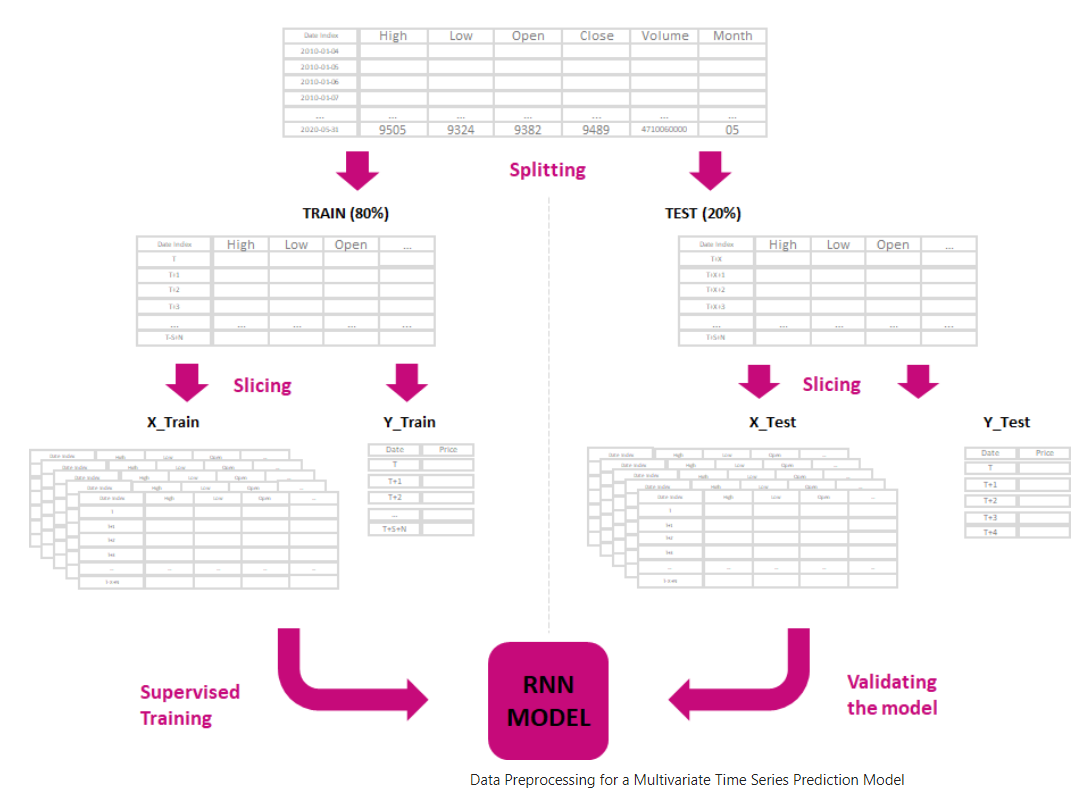

Aplicaremos la Sliding Window a nuestra data. El resultado será un set de entrenamiento (x_train) que contiene 6200 secuencias de input, y cada uno tieme 50 pasos-tiempo y 4 features. El set de target (y_train) contiene 6200 valores target. 


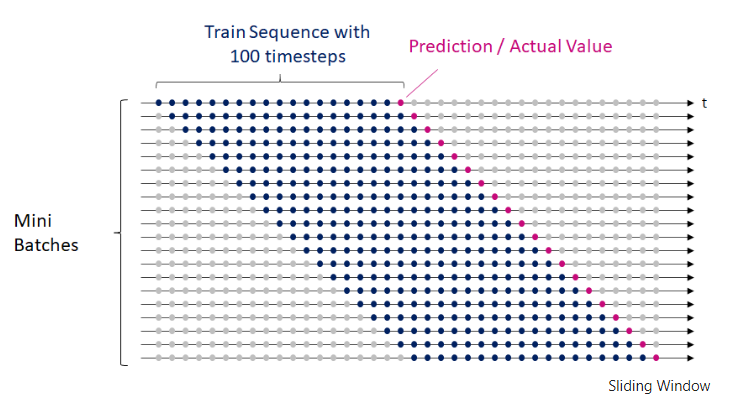

In [ ]:
# Configuramos largo de secuencia, o cuadro temporal utilizado para hacer una sola prediccion. 
sequence_length = 50

# Indice de Prediccion
index_Energia = data_filtered_ext.columns.get_loc('Energia')

# Partimos la data de entrenamiento entre test y train.
# Como primer paso, obtenemos el numero de filas para entrenar el modelo sobre el 80% de los data. 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Creamos la data de entrenamiento y prueba.
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

In [ ]:
# RNN necesita datos con formato =  [samples, time steps, features]
# Creamos N muetras, longitud de secuencia (pasos temporales) por muestra y las 4 features.
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #
        y.append(data[i, index_Energia]) #
    
    # Convertimos x e y a arrays de numpy.
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generamos la data de entrenamiento y prueba.
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Imprimimos:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validamos que el valor de prediccion y el input se correspondan.
# El ultimo dato anterior deberia ser igual al primer dato predicho.
print(x_train[1][sequence_length-1][index_Energia])
print(y_train[0])

(6200, 50, 4) (6200,)
(1562, 50, 4) (1562,)
0.3648093841642228
0.3648093841642228


## Paso #3 Entrenando el Modelo

Luego de preparar la data, entrenamos el RNN para predecir el Indice Energia. La arquitectura subyacente consiste de:

- LSTM layer, which takes our mini-batches as input and returns the whole sequence
- LSTM layer that takes the sequence from the previous layer, but only return 5 values
- Dense layer with 5 neurons
- final dense layer that outputs the predicted value

El numero de neuronas en la primer capa debe ser igual al tamaño de un minilote de la input data. Cada minlot en nuestro dataset consiste de una matriz de 50 pasos con 4 variables. Por ende, la capa input de nuestra red neuronal recursiva consiste de 200 neuronas. 

In [ ]:
# Configuramos el modelo
model = Sequential()

# Modelo con n_neurons = inputshape Timestamps, cada una con x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

200 50 4


Comenzamos el proceso de entrenamiento:

In [ ]:

epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/50
388/388 [==============================] - 109s 270ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 2/50
388/388 [==============================] - 82s 211ms/step - loss: 9.6585e-05 - val_loss: 2.7115e-04
Epoch 3/50
388/388 [==============================] - 79s 205ms/step - loss: 8.3215e-05 - val_loss: 4.4179e-04
Epoch 4/50
388/388 [==============================] - 99s 256ms/step - loss: 1.0296e-04 - val_loss: 0.0011
Epoch 5/50
388/388 [==============================] - 95s 244ms/step - loss: 7.0079e-05 - val_loss: 1.5249e-04
Epoch 6/50
388/388 [==============================] - 79s 203ms/step - loss: 6.8557e-05 - val_loss: 1.3636e-04
Epoch 7/50
388/388 [==============================] - 81s 210ms/step - loss: 6.4125e-05 - val_loss: 1.2292e-04
Epoch 8/50
388/388 [==============================] - 81s 209ms/step - loss: 6.5271e-05 - val_loss: 1.1228e-04
Epoch 9/50
388/388 [==============================] - 81s 208ms/step - loss: 5.4489e-05 - val_loss: 1.1604e-04
Epoch 10/50


Guardamos Modelo

In [ ]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
   json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save_weights("history.h5")
print("Saved model to disk")

Saved model to disk


Para cargarlo:

In [ ]:
#  Keras 

from keras.models import load_model
model = load_model("model.h5")

OSError: ignored

In [ ]:
# load json and create model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

FileNotFoundError: ignored

Observamos la curva de perdida.

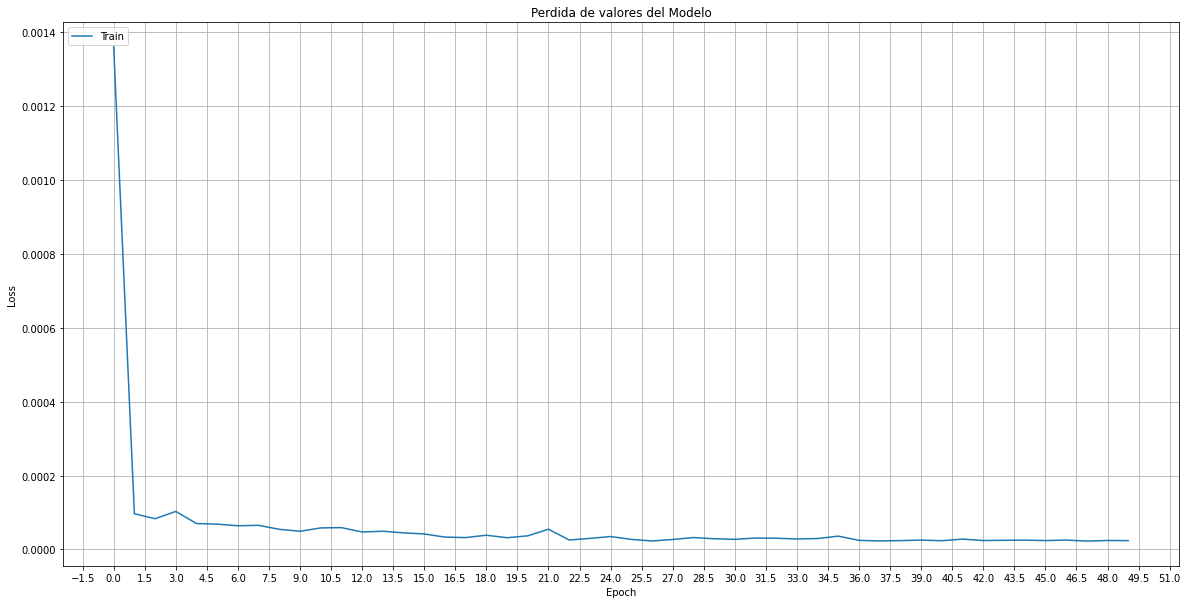

In [ ]:
# Graficamos entrenamiento y validacion de valores perdidos.
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Perdida de valores del Modelo")
plt.ylabel("Perdida")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

La perdida rapidamente cae a una meseta baja, señalando que el modelo mejora a traves del proceso de aprendizaje,.

## Paso #4 Evaluacion de rendimiento

Luego de haber entrenado el modelo, es tiempo de observar su performance. Primero hay que revertir el escalado para las predicciones. Calculamos tres metricas de errores: MAE, MAPE Y MDAPE. Luego comparamos la prediccion en un grafico. 

In [ ]:
# Obtener valores predichos
y_pred_scaled = model.predict(x_test)

# De-escalar
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 1.88
Mean Absolute Percentage Error (MAPE): 0.77 %
Median Absolute Percentage Error (MDAPE): 0.75 %


In [ ]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


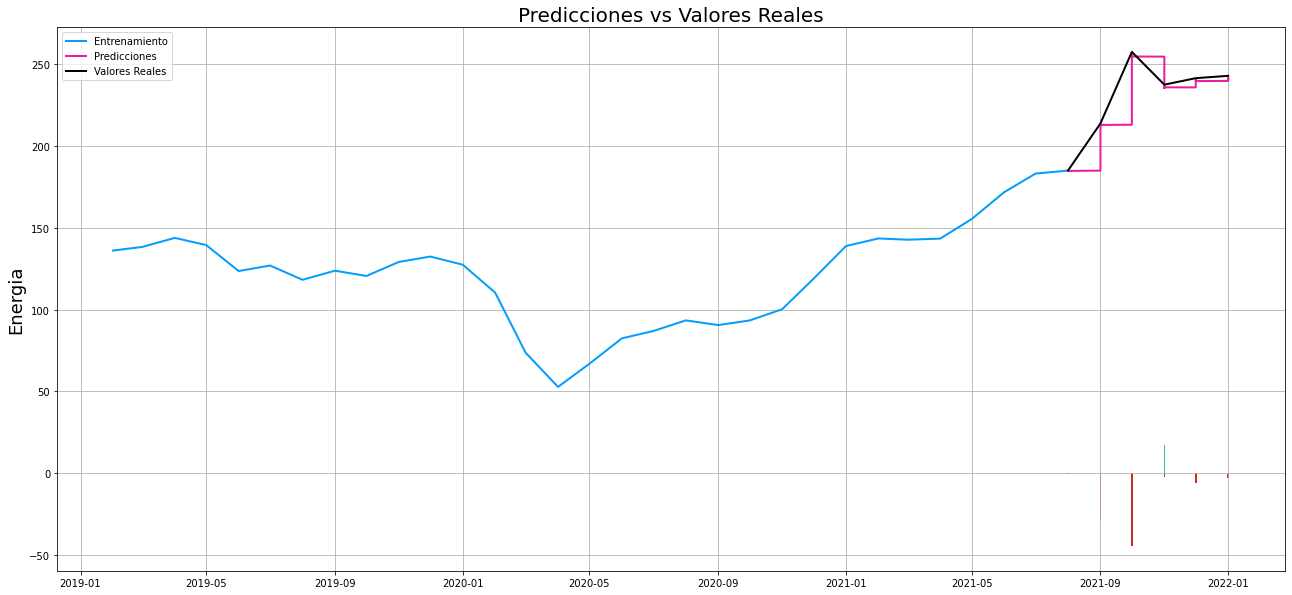

In [ ]:
# Fecha display
display_start_date = date_start 

# Añadimos columna previamente guardada para fecha
data_filtered_sub = train_df.copy()
data_filtered_sub['Fecha'] = date_index

# Diferencia entre valores predecidos y reales
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediccion", y_pred.ravel(), True)
valid.insert(1, "Diferencia", valid['Prediccion'] - valid['Energia'], True)

# Timeframe
valid = valid[valid['Fecha'] > display_start_date]
train = train[train['Fecha'] > display_start_date]

# Grafico
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Fecha']; yt = train[["Energia"]]
xv = valid['Fecha']; yv = valid[["Energia", "Prediccion"]]
plt.title("Predicciones vs Valores Reales", fontsize=20)
plt.ylabel("Energia", fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediccion"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Energia"], color="black", linewidth=2.0)
plt.legend(["Entrenamiento", "Predicciones", "Valores Reales"], loc="upper left")

# Diferencias
x = valid['Fecha']
y = valid["Diferencia"]

# Colores
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=1.5, color=valid['diff_color'])
plt.grid()
plt.show()

## Paso #5 : Prediccion

In [ ]:
df_temp = data_filtered_ext[-sequence_length:]
new_df = df_temp.filter(FEATURES)

N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['Energia'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for {"Energia"} at {today} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

KeyError: ignored

# Modelo de Regresion Lineal Multiple (MLR)

In [ ]:
# Importacion de Librerias

# Tratamiento de datos

import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Paso #1 : Datos y Relacion entre Variables

Estudiamos la relación que existe entre nuestras variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores.

In [ ]:
# Datos

X = df_Integrado[['Promedio Bursatil']]
y = df_Integrado['Energia']
Z = df_Integrado['Promedio Respuesta Estatal C19']
F = df_Integrado['Promedio Commodities']

df_lineal = df_Integrado[['Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19','Energia']]


In [ ]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_lineal.select_dtypes(include=['float64', 'int']).corr(method='pearson') #Si hacemos el dataset nuevo con las variables más arriba, tendriamos que cambiar df_integrado por el nuevo dataset.
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
7,Promedio Commodities,Energia,0.986789,0.986789
13,Energia,Promedio Commodities,0.986789,0.986789
1,Promedio Bursatil,Promedio Commodities,0.955467,0.955467
4,Promedio Commodities,Promedio Bursatil,0.955467,0.955467
3,Promedio Bursatil,Energia,0.929611,0.929611
12,Energia,Promedio Bursatil,0.929611,0.929611
2,Promedio Bursatil,Promedio Respuesta Estatal C19,0.046154,0.046154
8,Promedio Respuesta Estatal C19,Promedio Bursatil,0.046154,0.046154
6,Promedio Commodities,Promedio Respuesta Estatal C19,0.042497,0.042497
9,Promedio Respuesta Estatal C19,Promedio Commodities,0.042497,0.042497


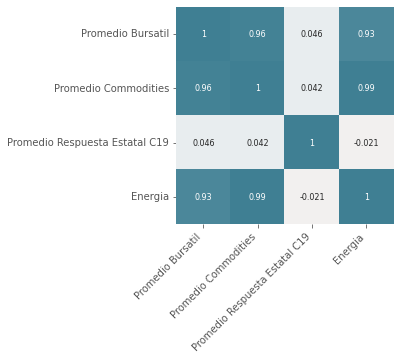

In [ ]:
# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

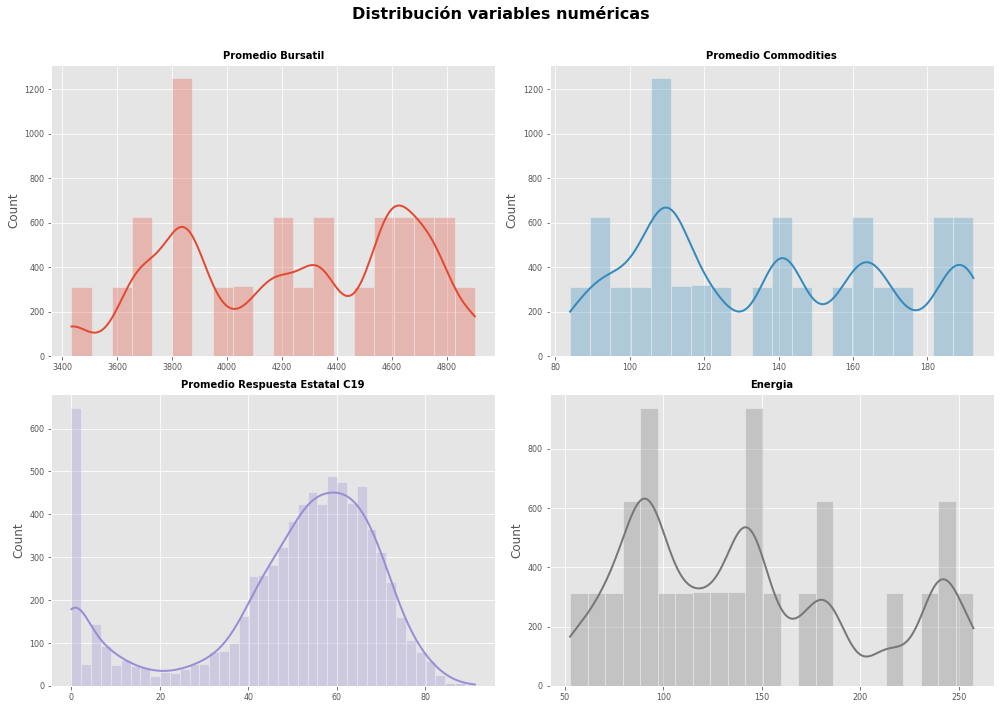

In [ ]:
# Gráfico de distribución para cada variable numérica


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flat
columnas_numeric = df_lineal.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_lineal,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 16, fontweight = "bold");

## Paso #2 : Ajuste del Modelo

Ajustamos el modelo lineal múltiple con el objetivo de predecir las el precio de la energia en función de los otros tres indices.

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = df_Integrado[['Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19']]
y = df_Integrado['Energia']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 9.852e+04
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:02:04   Log-Likelihood:                -22228.
No. Observations:                6249   AIC:                         4.446e+04
Df Residuals:                    6245   BIC:                         4.449e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Observaciones

El modelo con todas las variables introducidas como predictores tiene un  R2  alto (0.979), es capaz de explicar el 97.9% de la variabilidad observada en las ventas.

## Paso #3 : Intervalos de Confianza de los coeficientes

In [ ]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-41.383203,-32.377480
Promedio Bursatil,-0.021987,-0.018605
Promedio Commodities,1.982397,2.024925
Promedio Respuesta Estatal C19,-0.179090,-0.159896


## Paso #4 : Diagnostico de los Residuos

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento

y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

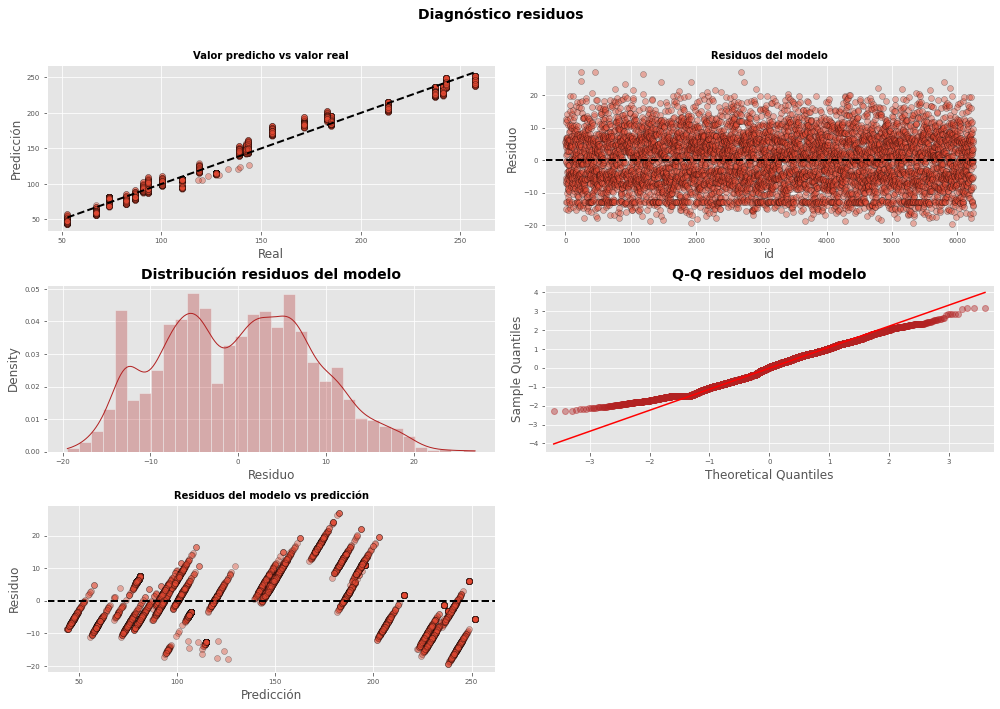

In [ ]:
# Gráficos

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 14,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 14, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 14, fontweight = "bold");

Los residuos no parecen distribuirse de forma aleatoria en torno a cero, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a una falta de homocedasticidad y de distribución normal.

## Paso #5 : Test de Normalidad 

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test

shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.986548900604248, 6.128026522924696e-24)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test

k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 296.86106276546275, p-value = 3.4469840554105594e-65


## Paso #6 : Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular los intervalos de confianza asociados a cada predicción.

In [ ]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
3185,105.910762,0.177912,105.561993,106.259530,89.271622,122.549901
4949,150.243894,0.206589,149.838908,150.648880,133.603481,166.884307
5855,195.575513,0.148897,195.283624,195.867402,178.937469,212.213557
6360,208.178049,0.170762,207.843296,208.512801,191.539197,224.816900


## Paso #7 : Error de test

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 8.290031039530389


Interpretacion

